In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import NMF

pd.set_option('display.max_columns', None, 'display.max_rows', None)

In [76]:
df = pd.read_csv('../data/survey_scaled.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2826 entries, 0 to 2825
Columns: 171 entries, moa1#1_1 to demo_us
dtypes: float64(171)
memory usage: 3.7 MB


In [185]:
# This will be used when grabbing verbose descriptions of columns
# In other words, the text of the questions
label_df = pd.read_csv('../data/labels_lower.csv')
label_df.tail(2)

,Variable Name,Question text,Survey Question ID
326,response_bias_sum,Sum of all Bias Dummy Variables,ADDED
327,school_coded,Cleaned Names of Schools Attended,ADDED


In [116]:
def get_question_text(colname, label_df=label_df):
    '''Get column description'''
    
    cond = label_df['Variable Name'] == colname
    idx = label_df.index[cond].tolist()[0]
    text = label_df.iloc[idx]['Question text']
    
    return text

In [19]:
# Lists of individual sections

moa = [c for c in df.columns if 'moa' in c]
idea = [c for c in df.columns if 'idea' in c]
swb = [c for c in df.columns if 'swb' in c]
mindful = [c for c in df.columns if 'mindful' in c]
belong = [c for c in df.columns if 'belong' in c]
efficacy = [c for c in df.columns if 'efficacy' in c]
support = [c for c in df.columns if 'support' in c]
socmedia = [c for c in df.columns if 'socmedia' in c]
usdream = [c for c in df.columns if 'usdream' in c]
transgres = [c for c in df.columns if 'transgres' in c]
exploit = [c for c in df.columns if 'exploit' in c]
disability = [c for c in df.columns if 'disability' in c]
phys = [c for c in df.columns if 'phys' in c]
stress = [c for c in df.columns if 'stress' in c]
marriage = [c for c in df.columns if 'marriage' in c]
demo = [c for c in df.columns if 'demo' in c]

In [18]:
X = StandardScaler().fit_transform(df)

In [9]:
# From https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

def plot_sil(X, ks):
    for i, k in enumerate(ks):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

        # Run the Kmeans algorithm
        km = KMeans(n_clusters=k)
        labels = km.fit_predict(X)
        centroids = km.cluster_centers_

        # Get silhouette samples
        silhouette_vals = silhouette_samples(df, labels)

        # Silhouette plot
        y_ticks = []
        y_lower, y_upper = 0, 0
        for i, cluster in enumerate(np.unique(labels)):
            cluster_silhouette_vals = silhouette_vals[labels == cluster]
            cluster_silhouette_vals.sort()
            y_upper += len(cluster_silhouette_vals)
            ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
            ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
            y_lower += len(cluster_silhouette_vals)

        # Get the average silhouette score and plot it
        avg_score = np.mean(silhouette_vals)
        ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
        ax1.set_yticks([])
        ax1.set_xlim([-0.1, 1])
        ax1.set_xlabel('Silhouette coefficient values')
        ax1.set_ylabel('Cluster labels')
        ax1.set_title('Silhouette plot for the various clusters', y=1.02);

        # Scatter plot of data colored with labels
#         ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
#         ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
#         ax2.set_xlim([-2, 2])
#         ax2.set_xlim([-2, 2])
#         ax2.set_xlabel('Eruption time in mins')
#         ax2.set_ylabel('Waiting time to next eruption')
#         ax2.set_title('Visualization of clustered data', y=1.02)
#         ax2.set_aspect('equal')
        plt.tight_layout()
        plt.suptitle(f'Silhouette analysis using k = {k}',
                     fontsize=16, fontweight='semibold', y=1.05);

In [19]:
km = KMeans(n_clusters=10, n_jobs=-1)

In [20]:
labels = km.fit_predict(X)

In [32]:
# ks = [5, 10, 15, 20, 25]

# plot_sil(X, ks)

In [24]:
def plot2(X, ks):
    for n_clusters in ks:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            cmap = cm.get_cmap("nipy_spectral")
            color = cmap(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhoutte score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
#         cmap = cm.get_cmap("nipy_spectral")
#         colors = cmap(cluster_labels.astype(float) / n_clusters)
#         ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                     c=colors)

#         # Labeling the clusters
#         centers = clusterer.cluster_centers_
#         # Draw white circles at cluster centers
#         ax2.scatter(centers[:, 0], centers[:, 1],
#                     marker='o', c="white", alpha=1, s=200)

#         for i, c in enumerate(centers):
#             ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

#         ax2.set_title("The visualization of the clustered data.")
#         ax2.set_xlabel("Feature space for the 1st feature")
#         ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

In [31]:
# ks = [2,3,4,5]
# plot2(X[:,:10], ks)

In [61]:
def plot_avg_sil_score(X, ks, iterations, verbose=False, savepath=None):
    df = pd.DataFrame(columns=ks)

    for i in range(iterations):
        sil_scores = []
        for k in ks:
            km = KMeans(n_clusters=k, n_jobs=-1)
            labels = km.fit_predict(X)    
            silhouette_vals = silhouette_samples(X, labels)
            avg_score = np.mean(silhouette_vals)
            sil_scores.append(avg_score)
        df.loc[i] = sil_scores
        if verbose:
            print(f'Iteration {i} Complete')
            
    fig, ax = plt.subplots(figsize=(9,5))
    ax = df.mean().plot(ax=ax)
    ax.set_xlabel('Number of Clusters (k)')
    ax.set_ylabel('Average Silhouette Score')
    ax.set_title(f'Avg Silhouette Score over {iterations} iterations')
    if savepath:
        fig.savefig(savepath)
    return df

Iteration 0 Complete
Iteration 1 Complete
Iteration 2 Complete
Iteration 3 Complete
Iteration 4 Complete
Iteration 5 Complete
Iteration 6 Complete
Iteration 7 Complete
Iteration 8 Complete
Iteration 9 Complete


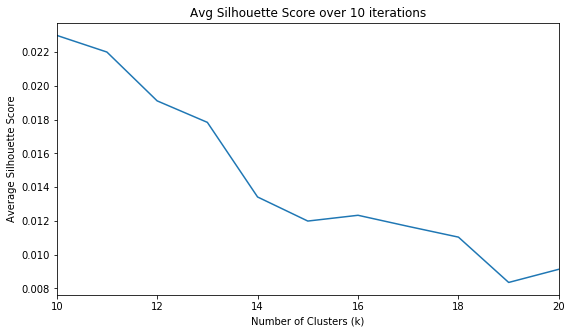

In [62]:
ks = range(10,21)

score_df = plot_avg_sil_score(X, ks, 10, verbose=True, 
                        savepath='../images/avg_sil_full_features.png')

In [224]:
def nmf_results(df, n_topics=5, top_ques=5, per_person=3, verbose=False): 
    
    # Fit NMF to X
    nmf = NMF(n_components=n_topics, random_state=1,
              alpha=.3, l1_ratio=.5).fit(df)

    # W matrix maps each row (person) from input matrix to topic vector -> shape(m, n_topics)
    W = nmf.transform(df)

    # For each row/person, grab the column indices with highest values
    top_n_per_person = W.argsort()[:,-per_person:][:,::-1]

    # topics is the H matrix, mapping each topic to feature (question) -> shape (n_topics, p)
    topics = nmf.components_
    
    topic_questions = []
    
    for i, topic in enumerate(topics):
        topidxs = np.argsort(topic)[::-1][:top_ques]
        toplist = [(round(topic[i], 2), colname, get_question_text(colname)) 
                   for i, colname in zip(topidxs, df.columns[topidxs])]
        to_string = ['{} -> {} -> {}'.format(*tup) for tup in toplist]
        topques = '\n'.join(to_string)
        topic_questions.append(toplist)
        if verbose:
            print(f'*****Topic: {i}*****\n**Top Questions:\n{topques}\n')
        
    return nmf, topic_questions, top_n_per_person

In [267]:
nmf, topic_questions, top_n_per_person = nmf_results(df, n_topics=12, top_ques=10, 
                                                     per_person=3, verbose=True)

*****Topic: 0*****
**Top Questions:
6.88 -> efficacy_7 -> I can remain calm when facing difficulties because I can rely on my coping abilities.
6.79 -> efficacy_4 -> I am confident that I could deal efficiently with unexpected events.
6.71 -> efficacy_10 -> I can usually handle whatever comes my way.
6.48 -> efficacy_6 -> I can solve most problems if I invest the necessary effort.
6.44 -> efficacy_9 -> If I am in trouble, I can usually think of a solution.
6.42 -> efficacy_5 -> Thanks to my resourcefulness, I know how to handle unforeseen situations.
6.38 -> efficacy_1 -> I can always manage to solve difficult problems if I try hard enough.
6.36 -> moa2#2_1 -> Make independent decisions
6.32 -> moa2#2_4 -> Accept responsibility for your actions
6.23 -> efficacy_8 -> When I am confronted with a problem, I can usually find several solutions.

*****Topic: 1*****
**Top Questions:
8.54 -> disability10_2 -> I don't think of myself as a disabled person.
8.12 -> disability10_11 -> I can live a

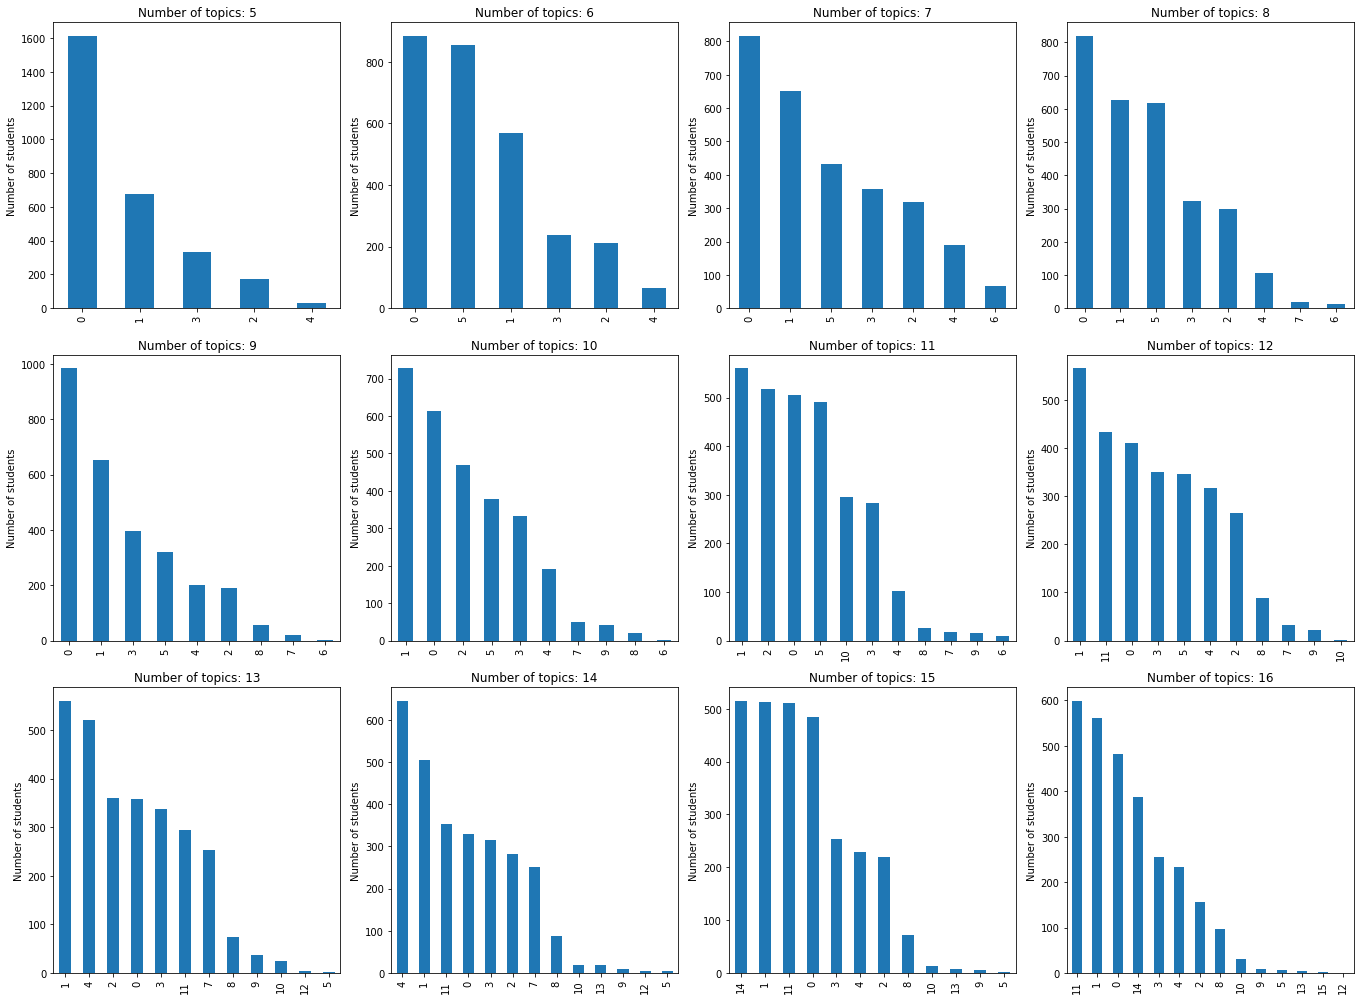

In [266]:
n=12

fig, axes = plt.subplots(3, int(n/3), figsize=(19,14))

for ax, num in zip(axes.flatten(), range(5,5+n)):
    nmf, topic_questions, top_n_per_person = nmf_results(df, n_topics=num)
    vals, counts = np.unique(top_n_per_person[:,0], return_counts=True)
    plot_df = pd.DataFrame(counts, vals)
    ax = plot_df.sort_values(0, ascending=False).plot(kind='bar', legend=False, ax=ax)
    ax.set_title(f'Number of topics: {num}')
    ax.set_ylabel('Number of students')

# plt.suptitle('Students per topic over increasing number of topics', fontsize=20)
plt.tight_layout()
fig.savefig('../images/Students per topic over increasing number of topics.png')

In [231]:
# These are the top indices
top_n_per_person[:5]

array([[14,  0,  5],
       [11, 14,  0],
       [11,  1, 10],
       [ 0, 10, 12],
       [ 4,  1,  2]])

In [232]:
# This normalizes each row of W to percentages
W = nmf.transform(df)

normed = W / W.sum(axis=1)[:,None]
normed[:3]

array([[0.14426321, 0.02917455, 0.00935914, 0.0310487 , 0.06707158,
        0.10089733, 0.06361096, 0.05021277, 0.02028906, 0.0314057 ,
        0.05313322, 0.0832797 , 0.03682855, 0.09368168, 0.18574385],
       [0.13120387, 0.03334166, 0.00502066, 0.03330468, 0.09342924,
        0.02013273, 0.07799294, 0.01937285, 0.00930368, 0.08474768,
        0.09584007, 0.17806894, 0.05537885, 0.02520791, 0.13765424],
       [0.04445179, 0.18021275, 0.00546415, 0.00439868, 0.04181206,
        0.06102455, 0.01335613, 0.05766061, 0.01965853, 0.0546341 ,
        0.11731682, 0.22287152, 0.01339024, 0.0808742 , 0.08287386]])

In [233]:
col_idx = np.arange(W.shape[0])[:,None]

# These are the percentages associated with the top indices
top_perc_per_person = normed[col_idx, top_n_per_person]
top_perc_per_person[:3]

array([[0.18574385, 0.14426321, 0.10089733],
       [0.17806894, 0.13765424, 0.13120387],
       [0.22287152, 0.18021275, 0.11731682]])